In [1]:
import pandas as pd
import numpy as np
%matplotlib inline

time_epoch = 60
epochs_per_batch = 100

# hard coded nrows
df_all = pd.read_csv('../../../diploma/multi-source-syber-security-events/flows.txt', header=None, nrows=500000)

df_all.columns = ['time', 'duration', 'source computer', 'source port', 'destination computer', 
              'destination port', 'protocol', 'packet count', 'byte count']

df = df_all[df_all['time'] <= epochs_per_batch * time_epoch]

df.index = df['time']
df.drop(columns=['time'],inplace=True)
df.head()

c:\users\sotiris\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


,duration,source computer,source port,destination computer,destination port,protocol,packet count,byte count
time,,,,,,,,
1,0,C1065,389,C3799,N10451,6,10,5323
1,0,C1423,N1136,C1707,N1,6,5,847
1,0,C1423,N1142,C1707,N1,6,5,847
1,0,C14909,N8191,C5720,2049,6,1,52
1,0,C14909,N8192,C5720,2049,6,1,52


In [2]:
# get all the host in the buckets we are interested in 

hosts = np.array(list(set(df_all[df_all['time'] <= epochs_per_batch * time_epoch * 2]['source computer'].values))) 

In [3]:
from helper import group_scale_data, group_scale_data_batch

groupped_data, hosts, parameters = group_scale_data(df, size_of_bin_seconds=60,
                                                    addZeros=True, doScale=True, scaler='log', verbose=1, hosts=hosts)

A total of 100 time epochs have been encountered
Done with 0 hosts out of 1912
Done with 95 hosts out of 1912
Done with 190 hosts out of 1912
Done with 285 hosts out of 1912
Done with 380 hosts out of 1912
Done with 475 hosts out of 1912
Done with 570 hosts out of 1912
Done with 665 hosts out of 1912
Done with 760 hosts out of 1912
Done with 855 hosts out of 1912
Done with 950 hosts out of 1912
Done with 1045 hosts out of 1912
Done with 1140 hosts out of 1912
Done with 1235 hosts out of 1912
Done with 1330 hosts out of 1912
Done with 1425 hosts out of 1912
Done with 1520 hosts out of 1912
Done with 1615 hosts out of 1912
Done with 1710 hosts out of 1912
Done with 1805 hosts out of 1912
Done with 1900 hosts out of 1912
Scaling...


In [4]:
print('Total number of hosts:', len(hosts))
print('Total datapoints:', len(groupped_data))

Total number of hosts: 1912
Total datapoints: 191200


In [5]:
groupped_data.head()

,number of flows,mean(byte count),epoch,source computer
66929,1,1,1,C320
67800,1,1,1,C3185
178079,1,1,1,C8501
107621,1,1,1,C14343
60421,1,1,1,C1433


In [6]:
# hard coded nrows
df_all = pd.read_csv('../../../diploma/multi-source-syber-security-events/flows.txt', header=None, nrows=500000)

df_all.columns = ['time', 'duration', 'source computer', 'source port', 'destination computer', 
              'destination port', 'protocol', 'packet count', 'byte count']

df = df_all[(df_all['time'] > epochs_per_batch * time_epoch) & (df_all['time'] <= epochs_per_batch * time_epoch * 2)]

df.index = df['time']
df.drop(columns=['time'],inplace=True)
df.head()

c:\users\sotiris\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.


,duration,source computer,source port,destination computer,destination port,protocol,packet count,byte count
time,,,,,,,,
6001,0,C1514,123,C625,123,17,1,96
6001,0,C1543,N603,C586,389,17,1,193
6001,0,C1685,N7,C6482,N2481,6,4,445
6001,0,C1685,N7,C6482,N2482,6,6,5055
6001,0,C17,N177,C1883,445,6,1,52


In [7]:
# scale the data using the same scaler

groupped_data_test, _ = group_scale_data_batch(df, parameters)
groupped_data_test['epoch'] += epochs_per_batch

In [8]:
from emClustering import OnlineEM
from plots import plot_points, plot_results, plot_category, plot_all_categories
from kplusplus import KPlusPlus

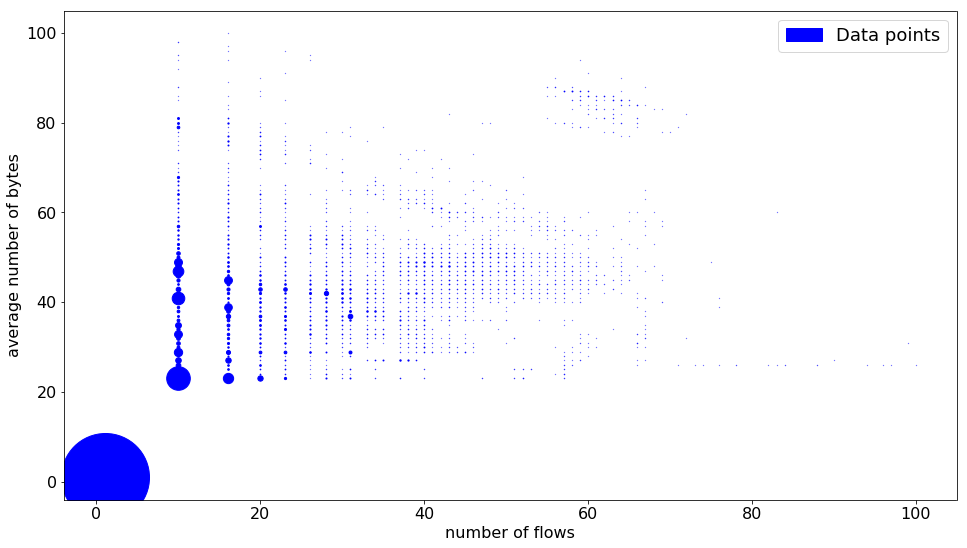

In [9]:
plot_points(groupped_data.values[:, :2])

Centers found: 1
Centers found: 2
Centers found: 3
Centers found: 4
Centers found: 5
Centers found: 6
Centers found: 7
Centers found: 8
Centers found: 9
Centers found: 10
Centers found: 11
Centers found: 12
Centers found: 13


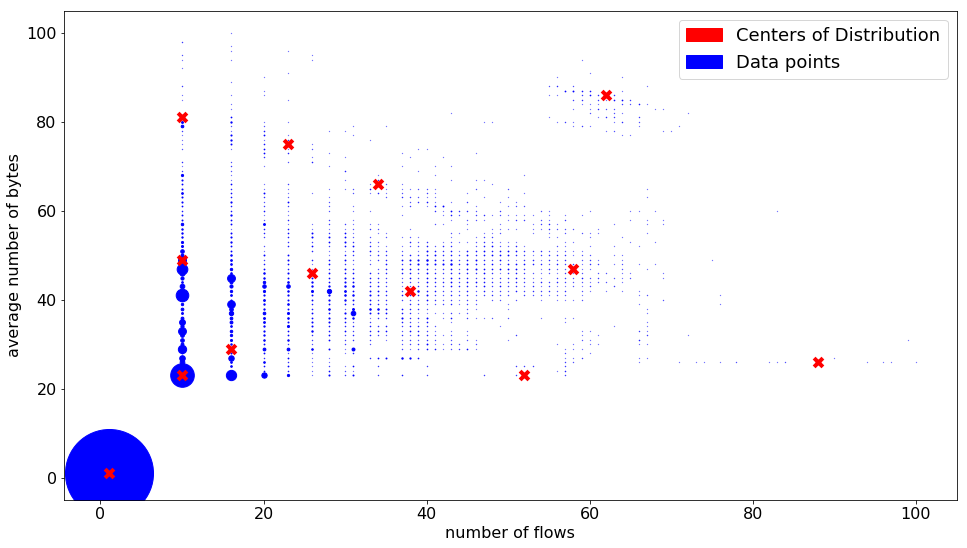

In [38]:
mixtures = 13

kplusplus = KPlusPlus(mixtures, groupped_data.values[:, :2], stochastic=True, stochastic_n_samples=10000)

kplusplus.init_centers(verbose=1)

test = int(len(set(groupped_data['source computer'].values)))

# random initialization
onlineEM = OnlineEM([1/mixtures]*mixtures, kplusplus.centers, test, n_clusters=8, verbose=1, update_power=0.5)

plot_points(groupped_data.values[:, :2], onlineEM)

In [39]:
data = groupped_data.values[:,[0,1,3]]

onlineEM.fit(data)

Running for data till position 1912 from total 191200
Running for data till position 3824 from total 191200
Running for data till position 5736 from total 191200
Running for data till position 7648 from total 191200
Running for data till position 9560 from total 191200
Running for data till position 11472 from total 191200
Running for data till position 13384 from total 191200
Running for data till position 15296 from total 191200
Running for data till position 17208 from total 191200
Running for data till position 19120 from total 191200
Running for data till position 21032 from total 191200
Running for data till position 22944 from total 191200
Running for data till position 24856 from total 191200
Running for data till position 26768 from total 191200
Running for data till position 28680 from total 191200
Running for data till position 30592 from total 191200
Running for data till position 32504 from total 191200
Running for data till position 34416 from total 191200
Running for dat

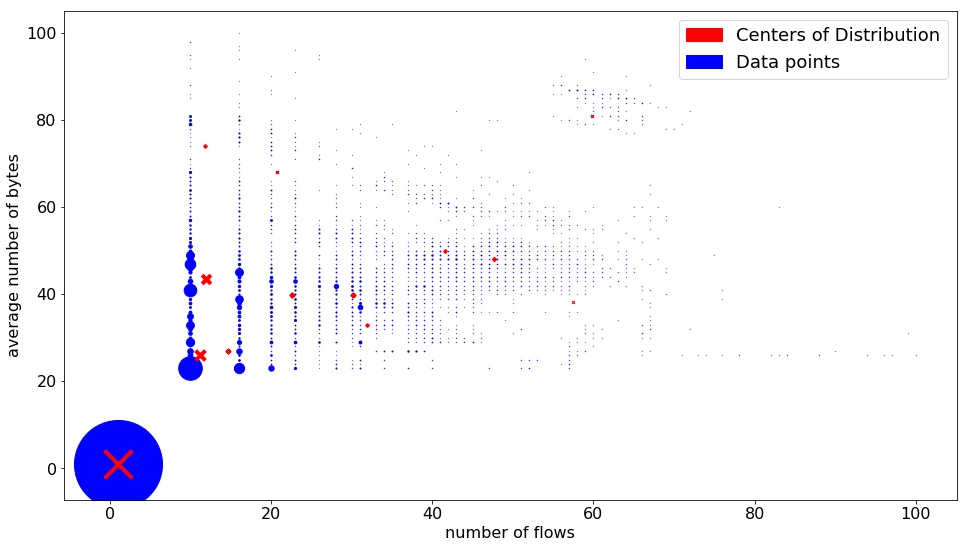

In [40]:
plot_points(groupped_data.values[:, :2], onlineEM)

In [41]:
onlineEM.lambdas

array([[1.0, 1.0],
       [59.876206771559886, 80.82260259915017],
       [11.218457854562821, 25.94033381679143],
       [11.788875431707556, 73.97679726934551],
       [31.93977653158563, 32.83594099495061],
       [22.622423546288168, 39.82141841912299],
       [11.924133451644071, 43.58391944577052],
       [57.522735698617815, 38.164442817763046],
       [47.64782204710027, 47.98408042439728],
       [14.690208661373148, 26.95918686277859],
       [20.679720410800485, 67.99523468723805],
       [30.215411584554932, 39.7318436822288],
       [41.551549395089985, 49.85899745792325]], dtype=object)

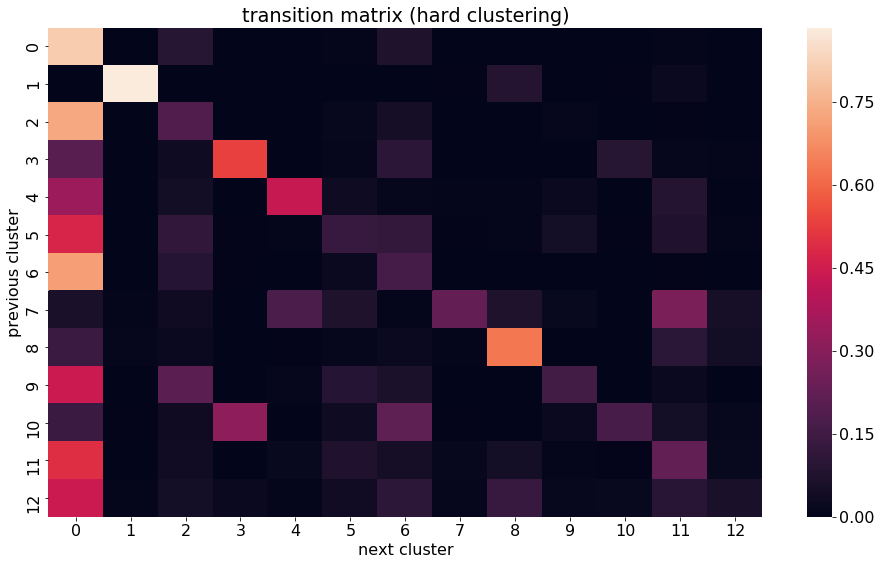

In [42]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from pylab import rcParams
rcParams['figure.figsize'] = 16, 9
rcParams['font.size'] = 16

ax = sns.heatmap(onlineEM.hard_transition_matrix)
plt.ylabel('previous cluster')
plt.xlabel('next cluster')
plt.title('transition matrix (hard clustering)')
plt.show()

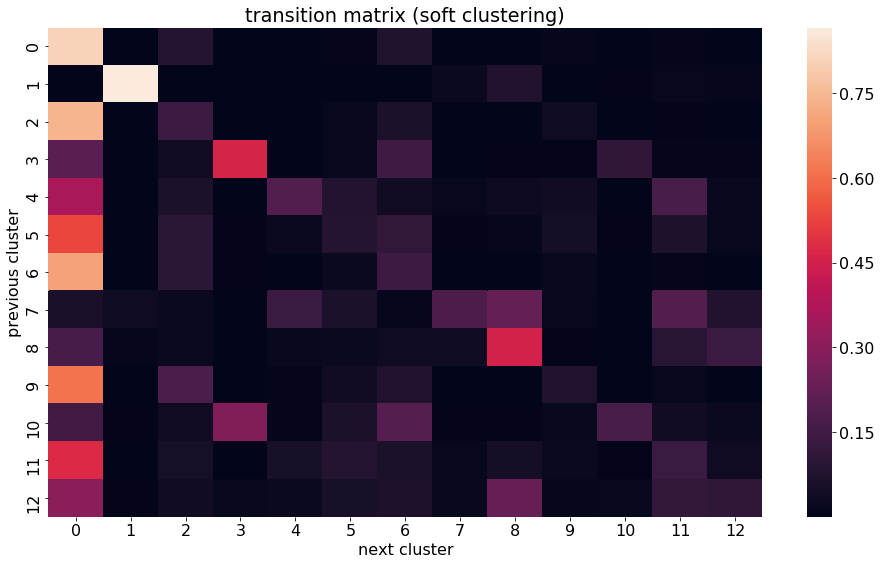

In [43]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from pylab import rcParams
rcParams['figure.figsize'] = 16, 9
rcParams['font.size'] = 16

ax = sns.heatmap(onlineEM.soft_transition_matrix)
plt.ylabel('previous cluster')
plt.xlabel('next cluster')
plt.title('transition matrix (soft clustering)')
plt.show()

In [50]:
onlineEM.hard_points_per_EM_cluster

array([  1.46801000e+05,   1.90000000e+02,   1.86810000e+04,
         6.37000000e+02,   4.97000000e+02,   2.54300000e+03,
         1.44140000e+04,   1.15000000e+02,   1.24800000e+03,
         1.05300000e+03,   1.90000000e+02,   2.49700000e+03,
         4.22000000e+02])

In [51]:
onlineEM.soft_points_per_EM_cluster

array([ 146801.        ,     194.08921819,   16784.58725931,
           610.27092265,     707.41290629,    2743.70439796,
         13973.04018604,     154.2735712 ,    1099.1497436 ,
          3193.14765076,     235.08477464,    2150.12930346,
           642.11006591])

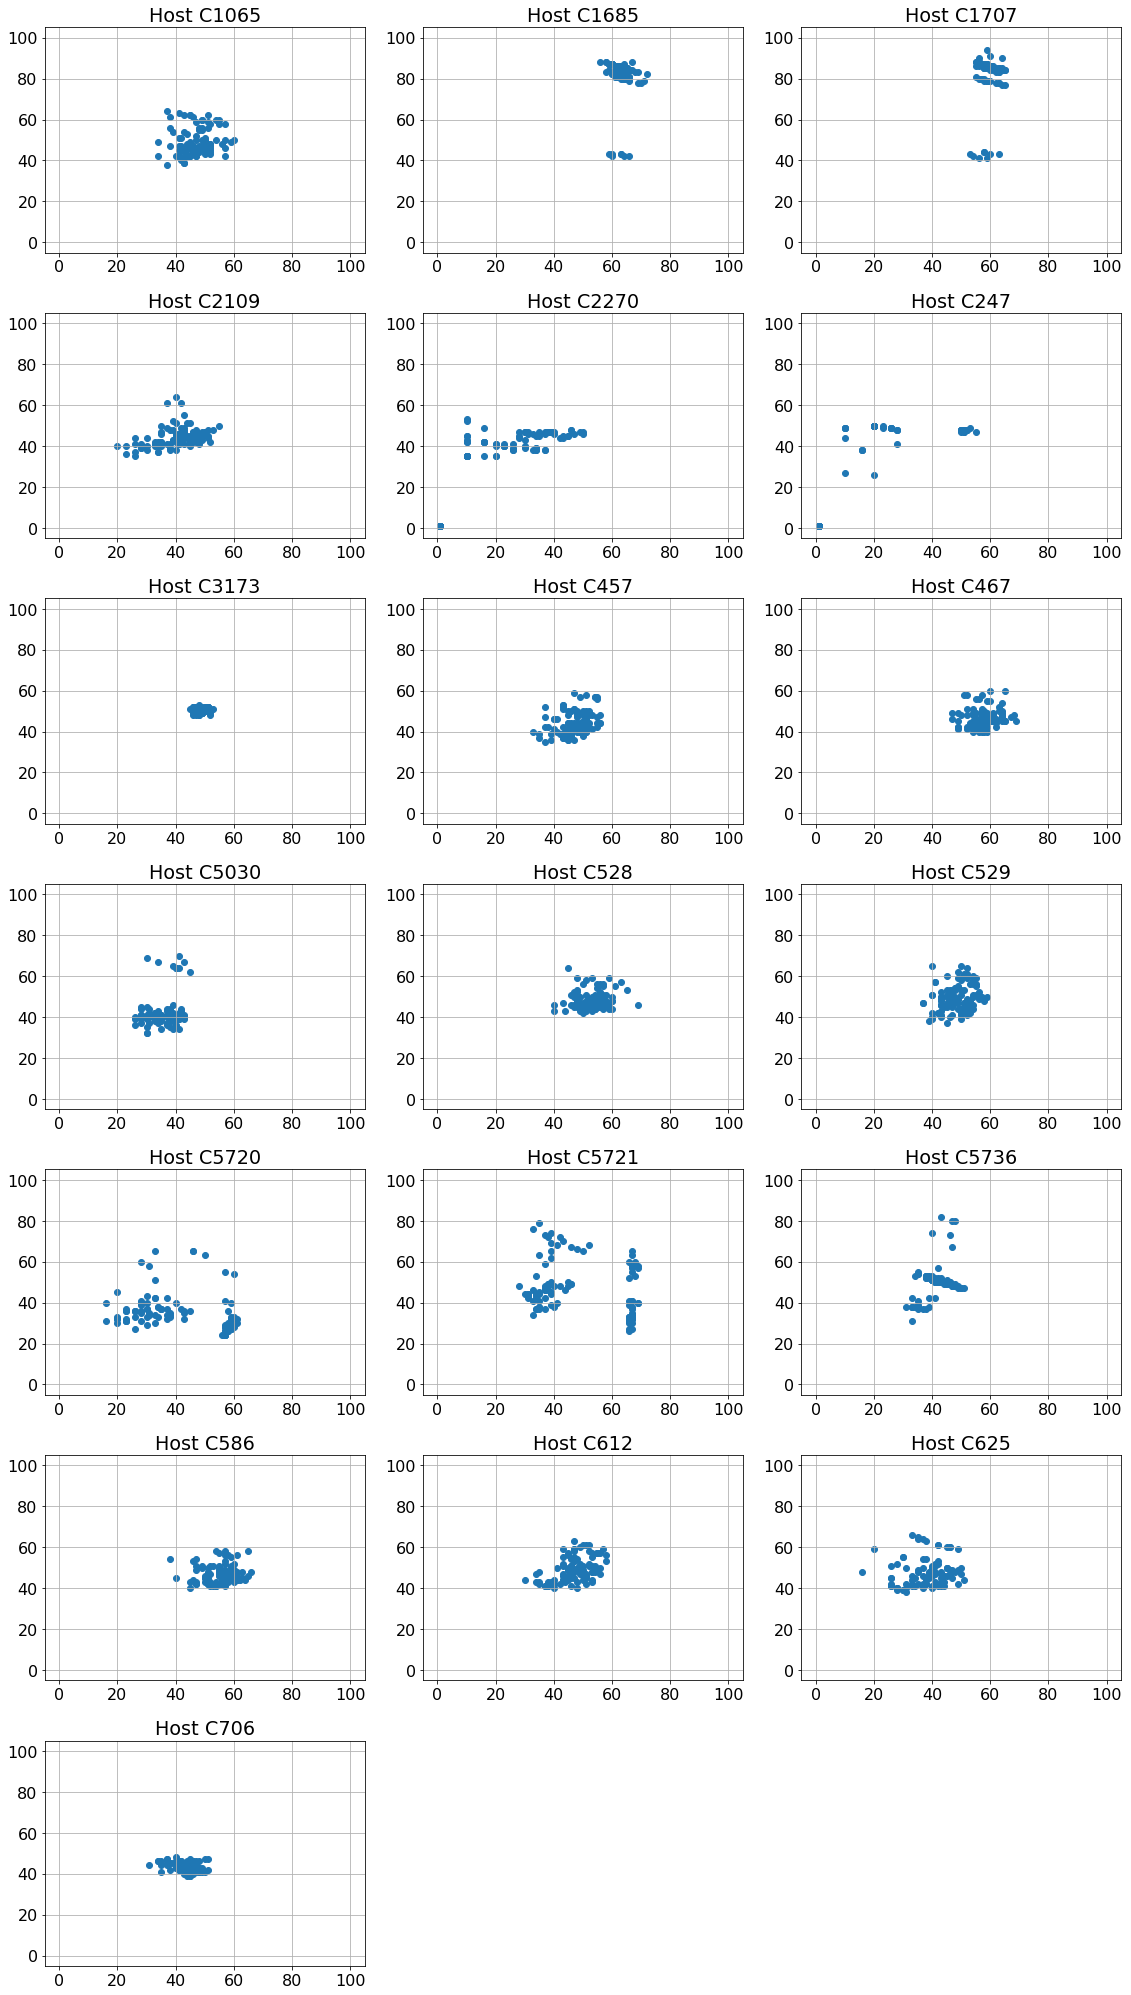

In [54]:
# Hosts in the upper cluster

temp = groupped_data[(groupped_data['number of flows'] > 40) & (groupped_data['mean(byte count)'] > 40)].groupby('source computer').count()


hosts = temp[temp['epoch'] > 3].index.values

total = len(hosts)

rcParams['figure.figsize'] = 16, (total + 2)/3 * 4
    
for i, host in enumerate(hosts):    
    plt.subplot((total + 2)/3, 3, i + 1)
    
    points = groupped_data[groupped_data['source computer'] == host].values

    plt.scatter(points[:, 0], points[:, 1])
    plt.xlim([-5, 105])
    plt.ylim([-5, 105])
    plt.title('Host ' + host)
    plt.grid()
    
plt.tight_layout()
plt.show()

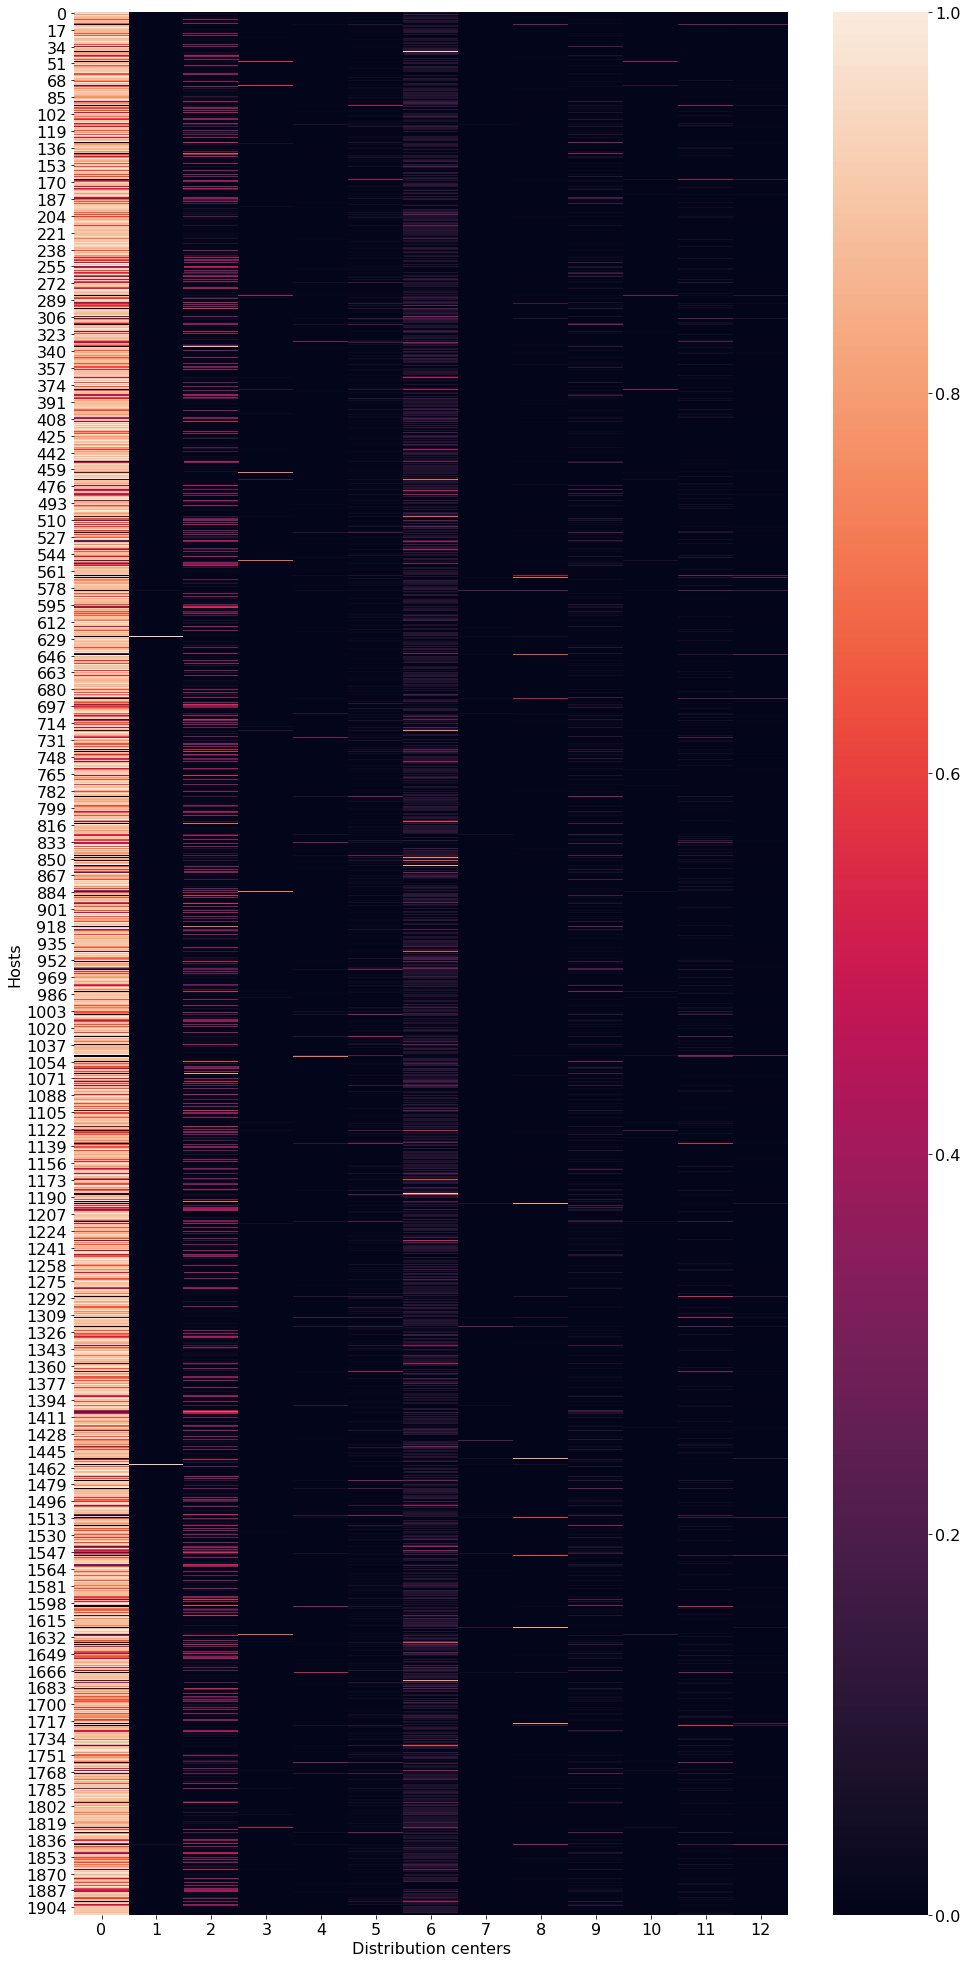

In [55]:
# HOST and clusters
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

hosts = list(set(groupped_data['source computer'].values))

from pylab import rcParams
rcParams['figure.figsize'] = 16, 35
rcParams['font.size'] = 16

heatmap_hosts = np.zeros(shape=(len(hosts), onlineEM.m))

for i, host in enumerate(hosts):
    heatmap_hosts[i] = onlineEM.hosts[host]['group']
    
ax = sns.heatmap(heatmap_hosts)
plt.ylabel('Hosts')
plt.xlabel('Distribution centers')
plt.show()

In [57]:
# Ν largest values of the cluster 1 
import heapq

heatmap_hosts[:,12][heapq.nlargest(3, range(len(heatmap_hosts[:,12])), heatmap_hosts[:,1].take)]

array([ 0.32740893,  0.26714113,  0.24544831])

Done with 0
Done with 10
Done with 20
Done with 30
Done with 40
Done with 50
Done with 60
Done with 70
Done with 80
Done with 90


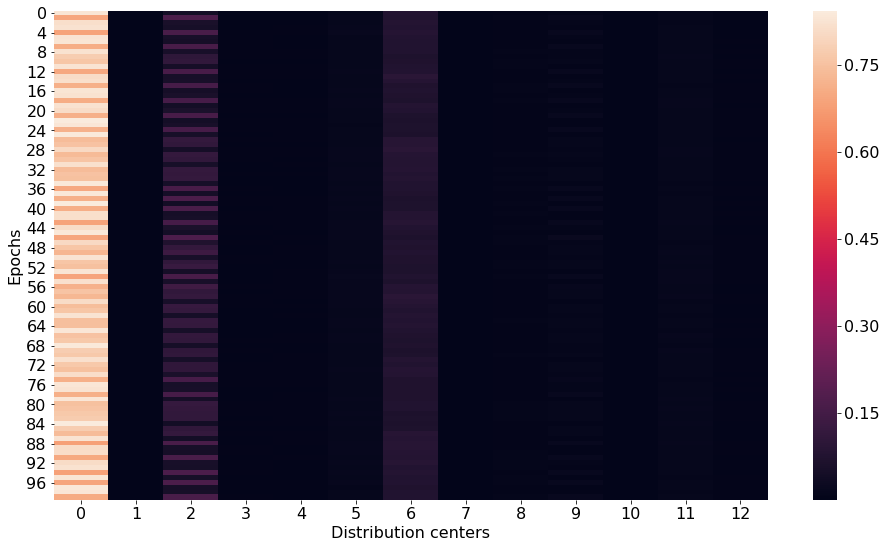

In [58]:
total_epochs = 100
time_epoch = 60


rcParams['figure.figsize'] = 16, 9

heatmap_epochs = np.zeros(shape=(total_epochs, onlineEM.m))

for i in range(total_epochs):
    # df = df_all[(df_all['time'] > i * time_epoch) & (df_all['time'] <= (i + 1) * time_epoch)]
    groupped_data_epoch = groupped_data[groupped_data['epoch'] == i + 1]
    data = groupped_data_epoch.values[:,[0,1,3]]
    
    f = onlineEM.calculate_participation(data)
    
    temp_sum = f.sum(axis=0)

    heatmap_epochs[i] = temp_sum / sum(temp_sum)
  
    if i % 10 == 0:
        print('Done with', i)
    
    
ax = sns.heatmap(heatmap_epochs)
plt.ylabel('Εpochs')
plt.xlabel('Distribution centers')
plt.show()

In [59]:
import scipy.stats.distributions
from math import log

def poisson(x, l):
    return_value = 1
    for x_i, l_i in zip(x, l):
        return_value *= scipy.stats.distributions.poisson.pmf(x_i, l_i)
    return return_value

# log likelihoods with and without clusters
def likelihoods(em, data):
    """
    data should be sorted by epoch
    """
    total_likelihood = 0
    total_likelihood_clusters = 0
    total_likelihood_hard_hmm = 0
    total_likelihood_soft_hmm = 0
    
    last_hard_cluster = {}
    last_soft_cluster = {}
    for host in em.hosts:
        last_hard_cluster[host] = em.hosts[host]['hard_previous']
        last_soft_cluster[host] = em.hosts[host]['soft_previous']
    
    n = 0
    for x_i in data:
        host = x_i[-1]
        if host in em.hosts:
            x = x_i[:-1]

            participations = np.array([poisson(x, lambda_i) for lambda_i in em.lambdas])

            total_likelihood += log(np.sum(em.gammas * participations))

            total_likelihood_clusters += log(np.sum(em.probabilities_per_kMean_cluster[em.hosts[host]['category']] * participations))
            
            total_likelihood_hard_hmm += log(np.sum(em.hard_transition_matrix[last_hard_cluster[host]] * participations))
            
            
            soft_likelihood = 0
            for i, previous in enumerate(last_soft_cluster[host]):
                soft_likelihood += np.sum(em.soft_transition_matrix[i] * participations) * previous
            
            total_likelihood_soft_hmm += log(soft_likelihood)
            
            point_center = em.closest_centers([x])
            last_hard_cluster[host] = np.argmax(point_center)
            last_soft_cluster[host] = point_center
            
            n += 1
        
    no_clusters = total_likelihood / n
    with_clusters = total_likelihood_clusters / n
    percentage_change = (with_clusters - no_clusters)*100 / no_clusters 
    hard_hmm = total_likelihood_hard_hmm / n
    percentage_change_hard_hmm = (hard_hmm - no_clusters)*100 / no_clusters 
    soft_hmm = total_likelihood_soft_hmm / n
    percentage_change_soft_hmm = (soft_hmm - no_clusters)*100 / no_clusters 
    return no_clusters, with_clusters, percentage_change, hard_hmm, percentage_change_hard_hmm, soft_hmm, percentage_change_soft_hmm

In [62]:
print('whole data', likelihoods(onlineEM, groupped_data_test.values[:,[0,1,3]]))

whole data (-3.626527428190368, -3.388545467844712, -6.56225452745048, -3.5428964037128603, -2.306091050833148, -3.5445610706287933, -2.260188546332756)


In [61]:
number_of_points = range(10, epochs_per_batch, 10)
for points in number_of_points:
    host_count = groupped_data[groupped_data['number of flows'] > 1].groupby('source computer').count()
    hosts_with_at_least_N_points = host_count[host_count['epoch'] > points].index.values

    data_for_host_with_lots_of_traffic = groupped_data_test[groupped_data_test['source computer'].isin(hosts_with_at_least_N_points)]

    print('Hosts with at least', points, 'points in the train data', likelihoods(onlineEM, data_for_host_with_lots_of_traffic.values[:,[0,1,3]]))

Hosts with at least 10 points in the train data (-4.079759401283624, -3.7712678388248713, -7.561513611849061, -3.968891208568468, -2.717517917362321, -3.9703966884619994, -2.680616724290549)
Hosts with at least 20 points in the train data (-5.173748229672977, -4.609745901037684, -10.90123259961846, -4.959943820959994, -4.1324857573615885, -4.962372784078518, -4.085537915860665)
Hosts with at least 30 points in the train data (-5.509815272719137, -4.819830152709091, -12.522835809512221, -5.24119882589657, -4.875235076438467, -5.244771994998283, -4.81038409823226)
Hosts with at least 40 points in the train data (-6.699323419168131, -5.617098545735779, -16.154241342280717, -6.178654909518448, -7.77195661520004, -6.180036888791562, -7.751327975759222)
Hosts with at least 50 points in the train data (-7.234182962190673, -5.917549496060146, -18.200168187781365, -6.558562219052775, -9.339281943365506, -6.561596834219023, -9.297333665555715)
Hosts with at least 60 points in the train data (-8.